# 📊 Setup and Loading Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'CSE Results - Semester 3.csv'
df = pd.read_csv(file_path)
select_columns = ['Name','SGPA']

# Display basic information
print(f"Total Students: {len(df)}")
# df.head(100)
print(df[select_columns].to_string())

Total Students: 200
                          Name   SGPA
0              FERNANDO K.N.D.  3.964
1               LAKSHAN H.M.K.  3.964
2                  GINIGE D.N.  3.940
3              NAWARATHNA T.P.  3.940
4              HEWARATHNA Y.M.  3.928
5              MAHANAMA K.J.C.  3.916
6          KULATHUNGE K.A.N.H.  3.904
7          MALLAWARACHCHI H.S.  3.904
8        WIJAYARATHNE T.W.O.A.  3.856
9              DAISHIKA K.S.H.  3.844
10             JAYASENA R.T.U.  3.824
11                SAHITHYAN K.  3.812
12                 LAKSHIKA G.  3.808
13             PABASARA H.H.J.  3.796
14            BANDARA K.G.P.Y.  3.764
15            ATUGEDARA A.D.I.  3.760
16           WIJESEKARA M.S.T.  3.752
17            GUNAWARDENA H.A.  3.752
18               AHAMED M.J.S.  3.744
19           HERATH H.M.M.P.B.  3.740
20             PERERA M.V.C.T.  3.728
21                  ABAIYAN R.  3.724
22               FERNANDO S.D.  3.716
23              THABREW D.C.L.  3.716
24             PERERA D.I.R.T.

# 📈 Summary Statistics

In [3]:
print("--- Overall SGPA Summary ---")
print(df['SGPA'].describe())

# Find the Top 5 Students
top_5 = df.nsmallest(5, 'Rank')[['Rank', 'Index', 'Name', 'SGPA']]
print("\n--- Top 5 Performers ---")
print(top_5.to_string(index=False))

--- Overall SGPA Summary ---
count    200.000000
mean       3.185020
std        0.535049
min        0.000000
25%        2.986000
50%        3.300000
75%        3.531000
max        3.964000
Name: SGPA, dtype: float64

--- Top 5 Performers ---
 Rank   Index            Name  SGPA
    1 230181J FERNANDO K.N.D. 3.964
    1 230365D  LAKSHAN H.M.K. 3.964
    3 230202D     GINIGE D.N. 3.940
    3 230427V NAWARATHNA T.P. 3.940
    5 230246N HEWARATHNA Y.M. 3.928


# 🎓 Subject-wise Grade Analysis

In [4]:
# Extract grade columns
grade_cols = [col for col in df.columns if '_Grade' in col]

# Calculate A-range percentage for each subject
a_range = ['A+', 'A', 'A-']
subject_stats = {}
for col in grade_cols:
    a_pct = (df[col].isin(a_range).sum() / len(df)) * 100
    subject_stats[col.replace('_Grade', '')] = a_pct

# Sort and display
sorted_stats = dict(sorted(subject_stats.items(), key=lambda x: x[1], reverse=True))
print("Percentage of A-range grades (A+, A, A-) per course:")
for sub, pct in sorted_stats.items():
    print(f"{sub}: {pct:.2f}%")

Percentage of A-range grades (A+, A, A-) per course:
CS2953: 67.50%
CS2043: 60.00%
CS2033: 55.50%
ME1823: 55.00%
MA2014: 40.50%
CS3043: 38.00%
CS2053: 30.50%
MA3014: 13.50%
CS3613: 6.00%


# 📉 Visualizations

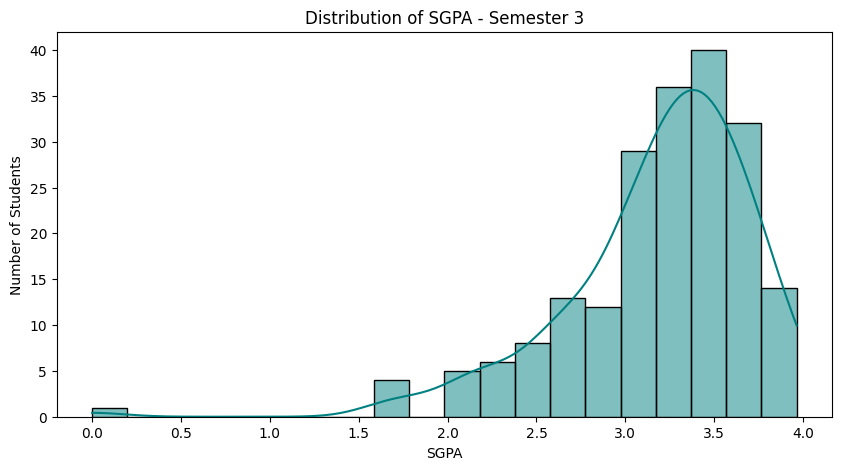

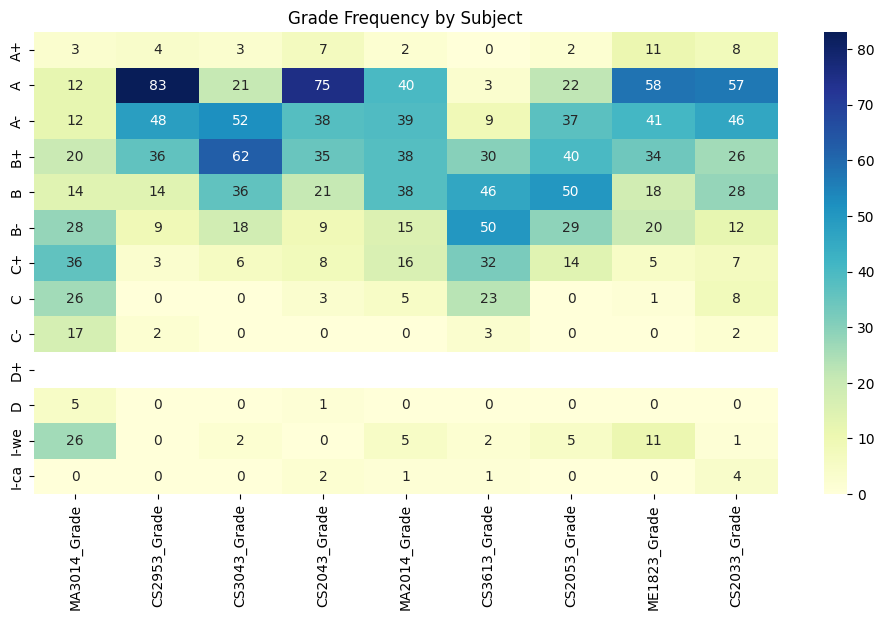

In [5]:
# SGPA Distribution Plot
plt.figure(figsize=(10, 5))
sns.histplot(df['SGPA'], bins=20, kde=True, color='teal')
plt.title('Distribution of SGPA - Semester 3')
plt.xlabel('SGPA')
plt.ylabel('Number of Students')
plt.show()

# Grade Distribution Heatmap/Table
grade_counts = df[grade_cols].apply(pd.Series.value_counts).fillna(0)
grade_order = ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'I-we', 'I-ca']
grade_counts = grade_counts.reindex(grade_order)

plt.figure(figsize=(12, 6))
sns.heatmap(grade_counts, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Grade Frequency by Subject')
plt.show()

# 🔍 Lookup by Index Number

In [7]:
def get_student_report(index_no):
    student = df[df['Index'] == index_no.upper()]
    if student.empty:
        return "Student not found."
    return student.T # Transpose for better readability

# Example usage:
index_to_search = '230291V' # Replace with any index number
get_student_report(index_to_search)

,95
Index,230291V
Name,JAYATHISSA W.M.V.K.
UoM Email,jayathissawmvk.23@uom.lk
MA3014_Grade,D
CS2953_Grade,A-
CS3043_Grade,B+
CS2043_Grade,A
MA2014_Grade,B
CS3613_Grade,C+
CS2053_Grade,A-


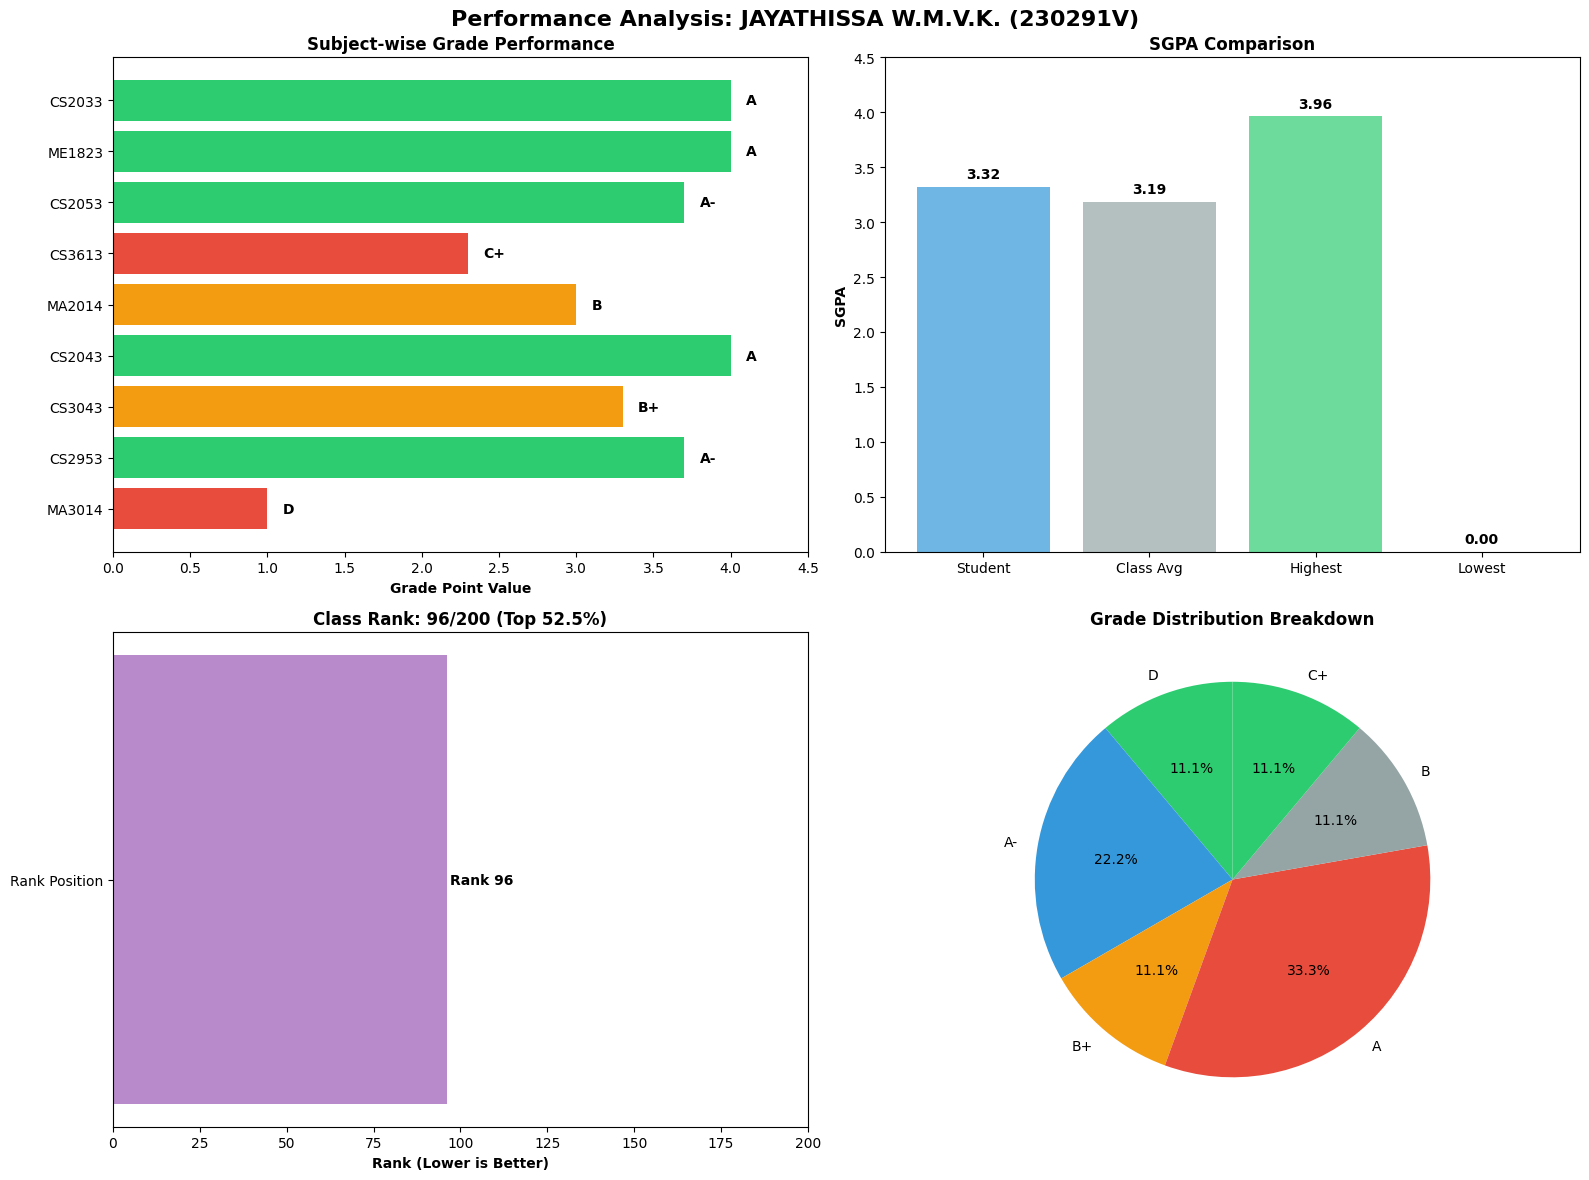


STUDENT SUMMARY: JAYATHISSA W.M.V.K.
Index Number: 230291V
SGPA: 3.32
Rank: 96/200
Percentile: Top 52.5%
Performance Level: Good


In [13]:
def analyze_student_performance(index_no):
    """Generate comprehensive visualizations for a specific student"""
    student = df[df['Index'] == index_no.upper()]
    
    if student.empty:
        print("Student not found.")
        return
    
    student_data = student.iloc[0]
    student_name = student_data['Name']
    student_sgpa = student_data['SGPA']
    student_rank = student_data['Rank']
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Performance Analysis: {student_name} ({index_no})', fontsize=16, fontweight='bold')
    
    # 1. Subject-wise Grades Bar Chart
    grade_cols = [col for col in df.columns if '_Grade' in col]
    subjects = [col.replace('_Grade', '') for col in grade_cols]
    grades = [student_data[col] for col in grade_cols]
    
    # Map grades to numeric values for visualization
    grade_values = {'A+': 4.0, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7, 
                   'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'I-we': 0, 'I-ca': 0}
    numeric_grades = [grade_values.get(g, 0) for g in grades]
    
    colors = ['#2ecc71' if v >= 3.7 else '#f39c12' if v >= 3.0 else '#e74c3c' for v in numeric_grades]
    axes[0, 0].barh(subjects, numeric_grades, color=colors)
    axes[0, 0].set_xlabel('Grade Point Value', fontweight='bold')
    axes[0, 0].set_title('Subject-wise Grade Performance', fontweight='bold')
    axes[0, 0].set_xlim(0, 4.5)
    
    # Add grade labels on bars
    for i, (grade, val) in enumerate(zip(grades, numeric_grades)):
        axes[0, 0].text(val + 0.1, i, grade, va='center', fontweight='bold')
    
    # 2. SGPA Comparison with Class
    avg_sgpa = df['SGPA'].mean()
    max_sgpa = df['SGPA'].max()
    min_sgpa = df['SGPA'].min()
    
    categories = ['Student', 'Class Avg', 'Highest', 'Lowest']
    sgpa_values = [student_sgpa, avg_sgpa, max_sgpa, min_sgpa]
    bar_colors = ['#3498db', '#95a5a6', '#2ecc71', '#e74c3c']
    
    bars = axes[0, 1].bar(categories, sgpa_values, color=bar_colors, alpha=0.7)
    axes[0, 1].set_ylabel('SGPA', fontweight='bold')
    axes[0, 1].set_title('SGPA Comparison', fontweight='bold')
    axes[0, 1].set_ylim(0, 4.5)
    
    # Add value labels on bars
    for bar, val in zip(bars, sgpa_values):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                       f'{val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Rank Position Visualization
    total_students = len(df)
    percentile = ((total_students - student_rank + 1) / total_students) * 100
    
    axes[1, 0].barh(['Rank Position'], [student_rank], color='#9b59b6', alpha=0.7)
    axes[1, 0].set_xlim(0, total_students)
    axes[1, 0].set_xlabel('Rank (Lower is Better)', fontweight='bold')
    axes[1, 0].set_title(f'Class Rank: {student_rank}/{total_students} (Top {percentile:.1f}%)', fontweight='bold')
    axes[1, 0].text(student_rank + 1, 0, f'Rank {student_rank}', va='center', fontweight='bold')
    
    # 4. Grade Distribution Pie Chart
    grade_counts = {}
    for grade in grades:
        grade_counts[grade] = grade_counts.get(grade, 0) + 1
    
    colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']
    axes[1, 1].pie(grade_counts.values(), labels=grade_counts.keys(), autopct='%1.1f%%',
                   colors=colors_pie[:len(grade_counts)], startangle=90)
    axes[1, 1].set_title('Grade Distribution Breakdown', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*60}")
    print(f"STUDENT SUMMARY: {student_name}")
    print(f"{'='*60}")
    print(f"Index Number: {index_no}")
    print(f"SGPA: {student_sgpa:.2f}")
    print(f"Rank: {student_rank}/{total_students}")
    print(f"Percentile: Top {percentile:.1f}%")
    print(f"Performance Level: {'Excellent' if student_sgpa >= 3.7 else 'Good' if student_sgpa >= 3.0 else 'Satisfactory' if student_sgpa >= 2.0 else 'Needs Improvement'}")
    print(f"{'='*60}")

# Example usage - analyze a specific student
student_index = '230291V'  # Change this to any student index
analyze_student_performance(student_index)

# 📊 Per-Student Performance Analysis